In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import KMeansSMOTE, SMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227845 samples, validate on 56962 samples
Epoch 1/150
227845/227845 [==============================] - 24s 105us/step - loss: 0.4497 - val_loss: 0.3650
Epoch 2/150
227845/227845 [==============================] - 22s 95us/step - loss: 0.3383 - val_loss: 0.3195
Epoch 3/150
227845/227845 [==============================] - 22s 97us/step - loss: 0.3159 - val_loss: 0.3072
Epoch 4/150
227845/227845 [==============================] - 22s 97us/step - loss: 0.3022 - val_loss: 0.3000
Epoch 5/150
227845/227845 [==============================] - 22s 95us/step - loss: 0.2904 - val_loss: 

227845/227845 [==============================] - 20s 87us/step - loss: 0.2348 - val_loss: 0.2414
Epoch 72/150
227845/227845 [==============================] - 20s 87us/step - loss: 0.2339 - val_loss: 0.2419
Epoch 73/150
227845/227845 [==============================] - 20s 87us/step - loss: 0.2353 - val_loss: 0.2437
Epoch 74/150
227845/227845 [==============================] - 20s 87us/step - loss: 0.2347 - val_loss: 0.2413
Epoch 75/150
227845/227845 [==============================] - 20s 87us/step - loss: 0.2348 - val_loss: 0.2392
Epoch 76/150
227845/227845 [==============================] - 20s 87us/step - loss: 0.2344 - val_loss: 0.2434
Epoch 77/150
227845/227845 [==============================] - 20s 87us/step - loss: 0.2342 - val_loss: 0.2419
Epoch 78/150
227845/227845 [==============================] - 20s 88us/step - loss: 0.2352 - val_loss: 0.2482
Epoch 79/150
227845/227845 [==============================] - 20s 87us/step - loss: 0.2338 - val_loss: 0.2412
Epoch 80/150
227845/227

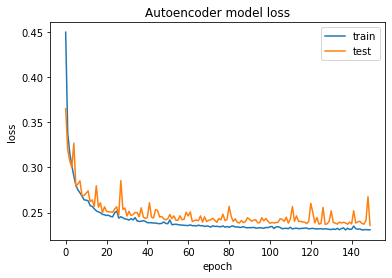

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 50s 219us/step - loss: 0.0562 - accuracy: 0.9861 - val_loss: 0.0077 - val_accuracy: 0.9994
Epoch 2/50
227845/227845 [==============================] - 48s 213us/step - loss: 0.0097 - accuracy: 0.9986 - val_loss: 0.0065 - val_accuracy: 0.9994
Epoch 3/50
227845/227845 [==============================] - 49s 213us/step - loss: 0.0074 - accuracy: 0.9988 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 4/50
227845/227845 [==============================] - 49s 216us/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 0.0059 - val_accuracy: 0.9994
Epoch 5/50
227845/227845 [==============================] - 49s 214us/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 6/50
227845/227845 [==============================] - 49s 216us/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 7/50
227845/227845 [=================

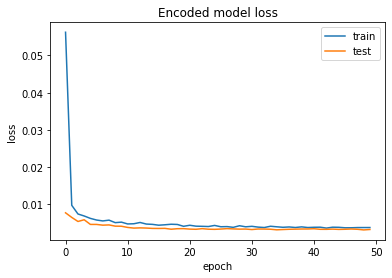

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993504441557529


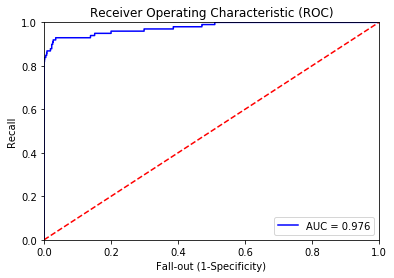

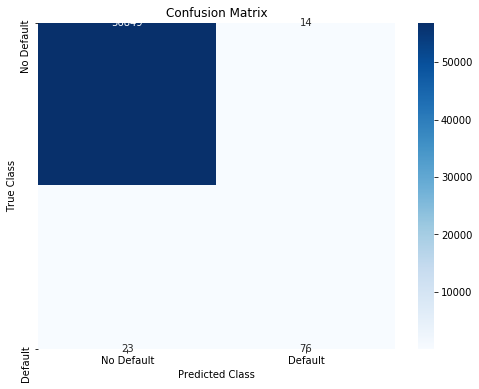

AUC(ROC): 0.8837152809419486
Precision: 0.8444444444444444
Recall: 0.7676767676767676
F1 score: 0.8042328042328042
False positives: 14
True positives: 76
False negatives: 23
True negatives: 56849
Fold #2


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227845 samples, validate on 56962 samples
Epoch 1/150
227845/227845 [==============================] - 21s 94us/step - loss: 0.4534 - val_loss: 0.3417
Epoch 2/150
227845/227845 [==============================] - 21s 92us/step - loss: 0.3276 - val_loss: 0.3116
Epoch 3/150
227845/227845 [==============================] - 21s 92us/step - loss: 0.3110 - val_loss: 0.2981
Epoch 4/150
227845/227845 [==============================] - 21s 91us/step - loss: 0.3029 - val_loss: 0.3068
Epoch 5/150
227845/227845 [==============================] - 21s 90us/step - loss: 0.2936 - val_loss: 0

227845/227845 [==============================] - 22s 95us/step - loss: 0.2348 - val_loss: 0.2335
Epoch 72/150
227845/227845 [==============================] - 21s 94us/step - loss: 0.2357 - val_loss: 0.2293
Epoch 73/150
227845/227845 [==============================] - 22s 95us/step - loss: 0.2344 - val_loss: 0.2327
Epoch 74/150
227845/227845 [==============================] - 21s 94us/step - loss: 0.2352 - val_loss: 0.2315
Epoch 75/150
227845/227845 [==============================] - 22s 95us/step - loss: 0.2347 - val_loss: 0.2327
Epoch 76/150
227845/227845 [==============================] - 22s 95us/step - loss: 0.2344 - val_loss: 0.2316
Epoch 77/150
227845/227845 [==============================] - 21s 94us/step - loss: 0.2345 - val_loss: 0.2378
Epoch 78/150
227845/227845 [==============================] - 22s 95us/step - loss: 0.2348 - val_loss: 0.2312
Epoch 79/150
227845/227845 [==============================] - 22s 95us/step - loss: 0.2341 - val_loss: 0.2317
Epoch 80/150
227845/227

227845/227845 [==============================] - 21s 91us/step - loss: 0.2297 - val_loss: 0.2252
Epoch 146/150
227845/227845 [==============================] - 21s 91us/step - loss: 0.2302 - val_loss: 0.2246
Epoch 147/150
227845/227845 [==============================] - 21s 90us/step - loss: 0.2296 - val_loss: 0.2311
Epoch 148/150
227845/227845 [==============================] - 21s 91us/step - loss: 0.2295 - val_loss: 0.2302
Epoch 149/150
227845/227845 [==============================] - 21s 90us/step - loss: 0.2289 - val_loss: 0.2248
Epoch 150/150
227845/227845 [==============================] - 21s 90us/step - loss: 0.2291 - val_loss: 0.2241


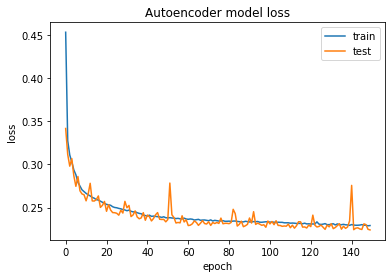

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 48s 212us/step - loss: 0.0707 - accuracy: 0.9772 - val_loss: 0.0076 - val_accuracy: 0.9992
Epoch 2/50
227845/227845 [==============================] - 47s 207us/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.0048 - val_accuracy: 0.9994
Epoch 3/50
227845/227845 [==============================] - 47s 205us/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 4/50
227845/227845 [==============================] - 47s 206us/step - loss: 0.0073 - accuracy: 0.9989 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 5/50
227845/227845 [==============================] - 47s 206us/step - loss: 0.0070 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 6/50
227845/227845 [==============================] - 47s 206us/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/50
227845/227845 [=================

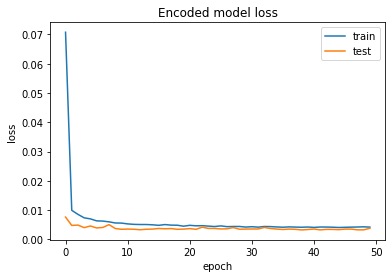

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999420666409185


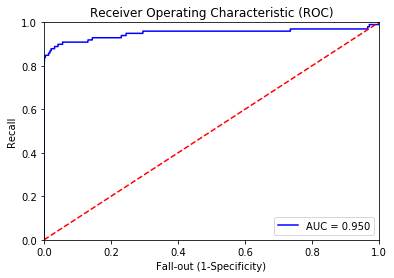

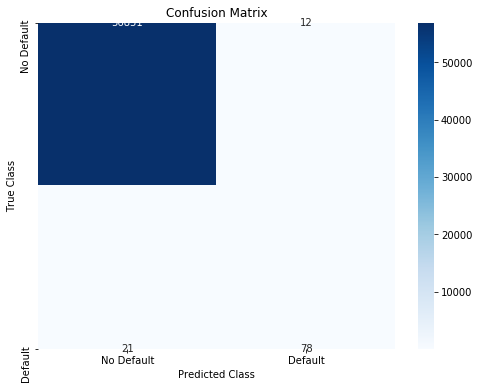

AUC(ROC): 0.8938338771710208
Precision: 0.8666666666666667
Recall: 0.7878787878787878
F1 score: 0.8253968253968254
False positives: 12
True positives: 78
False negatives: 21
True negatives: 56851
Fold #3


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 20s 90us/step - loss: 0.4484 - val_loss: 0.3522
Epoch 2/150
227846/227846 [==============================] - 20s 87us/step - loss: 0.3533 - val_loss: 0.3262
Epoch 3/150
227846/227846 [==============================] - 19s 82us/step - loss: 0.3358 - val_loss: 0.3146
Epoch 4/150
227846/227846 [==============================] - 19s 81us/step - loss: 0.3189 - val_loss: 0.3042
Epoch 5/150
227846/227846 [==============================] - 19s 81us/step - loss: 0.3093 - val_loss: 0

227846/227846 [==============================] - 19s 81us/step - loss: 0.2458 - val_loss: 0.2586
Epoch 72/150
227846/227846 [==============================] - 19s 81us/step - loss: 0.2467 - val_loss: 0.2396
Epoch 73/150
227846/227846 [==============================] - 19s 83us/step - loss: 0.2459 - val_loss: 0.2448
Epoch 74/150
227846/227846 [==============================] - 20s 86us/step - loss: 0.2472 - val_loss: 0.2368
Epoch 75/150
227846/227846 [==============================] - 20s 87us/step - loss: 0.2459 - val_loss: 0.2398
Epoch 76/150
227846/227846 [==============================] - 20s 86us/step - loss: 0.2506 - val_loss: 0.2434
Epoch 77/150
227846/227846 [==============================] - 20s 86us/step - loss: 0.2466 - val_loss: 0.2368
Epoch 78/150
227846/227846 [==============================] - 20s 86us/step - loss: 0.2458 - val_loss: 0.2386
Epoch 79/150
227846/227846 [==============================] - 20s 86us/step - loss: 0.2469 - val_loss: 0.2445
Epoch 80/150
227846/227

227846/227846 [==============================] - 21s 92us/step - loss: 0.2399 - val_loss: 0.2433
Epoch 146/150
227846/227846 [==============================] - 21s 92us/step - loss: 0.2394 - val_loss: 0.2286
Epoch 147/150
227846/227846 [==============================] - 21s 92us/step - loss: 0.2384 - val_loss: 0.2302
Epoch 148/150
227846/227846 [==============================] - 21s 92us/step - loss: 0.2391 - val_loss: 0.2303
Epoch 149/150
227846/227846 [==============================] - 21s 92us/step - loss: 0.2394 - val_loss: 0.2279
Epoch 150/150
227846/227846 [==============================] - 21s 92us/step - loss: 0.2412 - val_loss: 0.2370


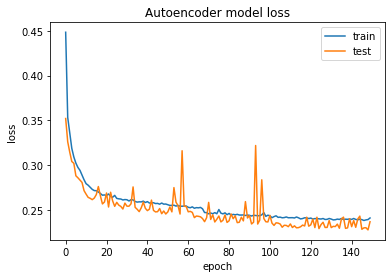

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 58s 254us/step - loss: 0.0252 - accuracy: 0.9956 - val_loss: 0.0091 - val_accuracy: 0.9988
Epoch 2/50
227846/227846 [==============================] - 56s 246us/step - loss: 0.0091 - accuracy: 0.9984 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 3/50
227846/227846 [==============================] - 49s 214us/step - loss: 0.0078 - accuracy: 0.9987 - val_loss: 0.0076 - val_accuracy: 0.9988
Epoch 4/50
227846/227846 [==============================] - 49s 213us/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0064 - val_accuracy: 0.9991
Epoch 5/50
227846/227846 [==============================] - 48s 211us/step - loss: 0.0067 - accuracy: 0.9988 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 6/50
227846/227846 [==============================] - 48s 209us/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0053 - val_accuracy: 0.9992
Epoch 7/50
227846/227846 [=================

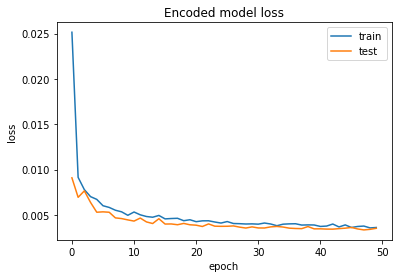

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993328768806727


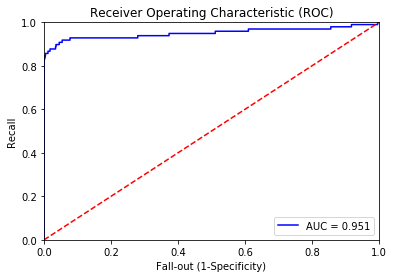

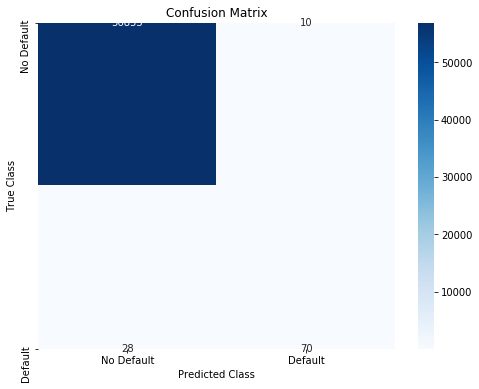

AUC(ROC): 0.8570549265025462
Precision: 0.875
Recall: 0.7142857142857143
F1 score: 0.7865168539325842
False positives: 10
True positives: 70
False negatives: 28
True negatives: 56853
Fold #4


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 22s 97us/step - loss: 0.4503 - val_loss: 0.3556
Epoch 2/150
227846/227846 [==============================] - 21s 93us/step - loss: 0.3339 - val_loss: 0.3210
Epoch 3/150
227846/227846 [==============================] - 21s 93us/step - loss: 0.3145 - val_loss: 0.3064
Epoch 4/150
227846/227846 [==============================] - 21s 93us/step - loss: 0.3053 - val_loss: 0.2988
Epoch 5/150
227846/227846 [==============================] - 21s 92us/step - loss: 0.2994 - val_loss: 0

227846/227846 [==============================] - 21s 94us/step - loss: 0.2488 - val_loss: 0.2471
Epoch 72/150
227846/227846 [==============================] - 22s 95us/step - loss: 0.2495 - val_loss: 0.2490
Epoch 73/150
227846/227846 [==============================] - 21s 94us/step - loss: 0.2487 - val_loss: 0.2472
Epoch 74/150
227846/227846 [==============================] - 22s 94us/step - loss: 0.2487 - val_loss: 0.2502
Epoch 75/150
227846/227846 [==============================] - 21s 94us/step - loss: 0.2488 - val_loss: 0.2578
Epoch 76/150
227846/227846 [==============================] - 22s 95us/step - loss: 0.2486 - val_loss: 0.2477
Epoch 77/150
227846/227846 [==============================] - 22s 96us/step - loss: 0.2494 - val_loss: 0.2479
Epoch 78/150
227846/227846 [==============================] - 21s 94us/step - loss: 0.2478 - val_loss: 0.2481
Epoch 79/150
227846/227846 [==============================] - 22s 97us/step - loss: 0.2482 - val_loss: 0.2472
Epoch 80/150
227846/227

227846/227846 [==============================] - 21s 93us/step - loss: 0.2435 - val_loss: 0.2488
Epoch 146/150
227846/227846 [==============================] - 21s 93us/step - loss: 0.2431 - val_loss: 0.2488
Epoch 147/150
227846/227846 [==============================] - 21s 91us/step - loss: 0.2436 - val_loss: 0.2439
Epoch 148/150
227846/227846 [==============================] - 18s 78us/step - loss: 0.2430 - val_loss: 0.2483
Epoch 149/150
227846/227846 [==============================] - 18s 81us/step - loss: 0.2428 - val_loss: 0.2447
Epoch 150/150
227846/227846 [==============================] - 22s 95us/step - loss: 0.2433 - val_loss: 0.2414


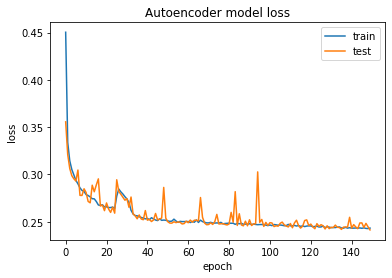

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 59s 257us/step - loss: 0.0331 - accuracy: 0.9928 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 2/50
227846/227846 [==============================] - 49s 214us/step - loss: 0.0103 - accuracy: 0.9985 - val_loss: 0.0056 - val_accuracy: 0.9992
Epoch 3/50
227846/227846 [==============================] - 49s 215us/step - loss: 0.0087 - accuracy: 0.9986 - val_loss: 0.0051 - val_accuracy: 0.9993
Epoch 4/50
227846/227846 [==============================] - 50s 218us/step - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0054 - val_accuracy: 0.9992
Epoch 5/50
227846/227846 [==============================] - 50s 219us/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 6/50
227846/227846 [==============================] - 50s 220us/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 7/50
227846/227846 [=================

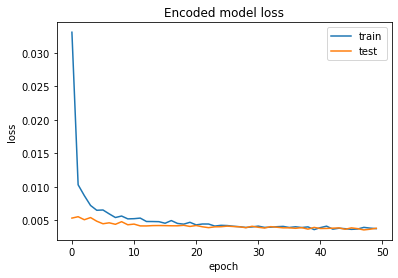

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993328768806727


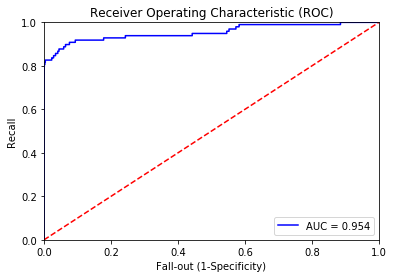

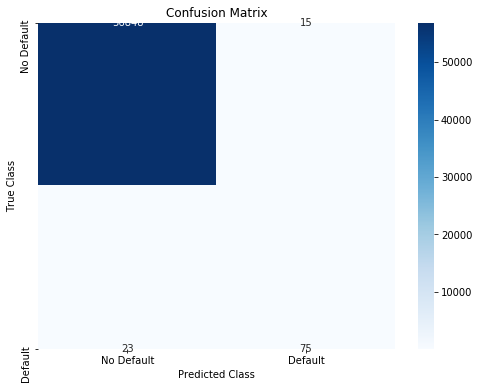

AUC(ROC): 0.8825211652640236
Precision: 0.8333333333333334
Recall: 0.7653061224489796
F1 score: 0.7978723404255319
False positives: 15
True positives: 75
False negatives: 23
True negatives: 56848
Fold #5


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 23s 100us/step - loss: 0.4661 - val_loss: 0.3728
Epoch 2/150
227846/227846 [==============================] - 22s 96us/step - loss: 0.3565 - val_loss: 0.3340
Epoch 3/150
227846/227846 [==============================] - 22s 96us/step - loss: 0.3312 - val_loss: 0.3126
Epoch 4/150
227846/227846 [==============================] - 22s 96us/step - loss: 0.3210 - val_loss: 0.3312
Epoch 5/150
227846/227846 [==============================] - 22s 96us/step - loss: 0.3121 - val_loss: 

227846/227846 [==============================] - 22s 96us/step - loss: 0.2436 - val_loss: 0.2385
Epoch 72/150
227846/227846 [==============================] - 22s 95us/step - loss: 0.2422 - val_loss: 0.2358
Epoch 73/150
227846/227846 [==============================] - 21s 94us/step - loss: 0.2441 - val_loss: 0.2339
Epoch 74/150
227846/227846 [==============================] - 22s 96us/step - loss: 0.2418 - val_loss: 0.2367
Epoch 75/150
227846/227846 [==============================] - 22s 96us/step - loss: 0.2430 - val_loss: 0.2397
Epoch 76/150
227846/227846 [==============================] - 22s 97us/step - loss: 0.2432 - val_loss: 0.2341
Epoch 77/150
227846/227846 [==============================] - 22s 96us/step - loss: 0.2437 - val_loss: 0.2351
Epoch 78/150
227846/227846 [==============================] - 22s 95us/step - loss: 0.2424 - val_loss: 0.2356
Epoch 79/150
227846/227846 [==============================] - 22s 94us/step - loss: 0.2429 - val_loss: 0.2354
Epoch 80/150
227846/227

227846/227846 [==============================] - 21s 93us/step - loss: 0.2398 - val_loss: 0.2368
Epoch 146/150
227846/227846 [==============================] - 22s 95us/step - loss: 0.2409 - val_loss: 0.2358
Epoch 147/150
227846/227846 [==============================] - 22s 95us/step - loss: 0.2399 - val_loss: 0.2412
Epoch 148/150
227846/227846 [==============================] - 21s 93us/step - loss: 0.2404 - val_loss: 0.2346
Epoch 149/150
227846/227846 [==============================] - 21s 94us/step - loss: 0.2393 - val_loss: 0.2335
Epoch 150/150
227846/227846 [==============================] - 21s 93us/step - loss: 0.2390 - val_loss: 0.2334


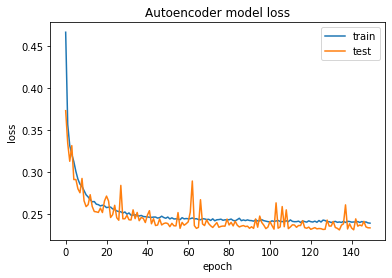

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 50s 220us/step - loss: 0.0574 - accuracy: 0.9825 - val_loss: 0.0084 - val_accuracy: 0.9991
Epoch 2/50
227846/227846 [==============================] - 48s 209us/step - loss: 0.0094 - accuracy: 0.9986 - val_loss: 0.0069 - val_accuracy: 0.9991
Epoch 3/50
227846/227846 [==============================] - 46s 202us/step - loss: 0.0074 - accuracy: 0.9989 - val_loss: 0.0060 - val_accuracy: 0.9991
Epoch 4/50
227846/227846 [==============================] - 47s 205us/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0056 - val_accuracy: 0.9992
Epoch 5/50
227846/227846 [==============================] - 48s 211us/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0053 - val_accuracy: 0.9992
Epoch 6/50
227846/227846 [==============================] - 48s 210us/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 7/50
227846/227846 [=================

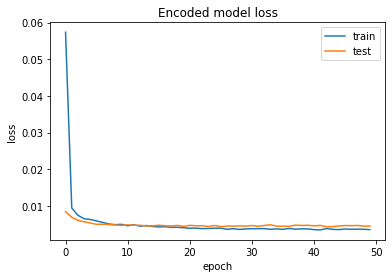

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993153210091115


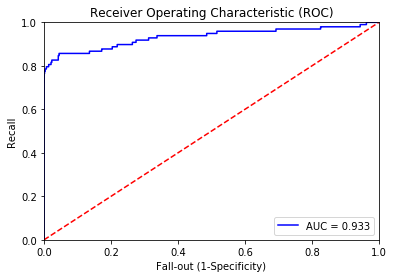

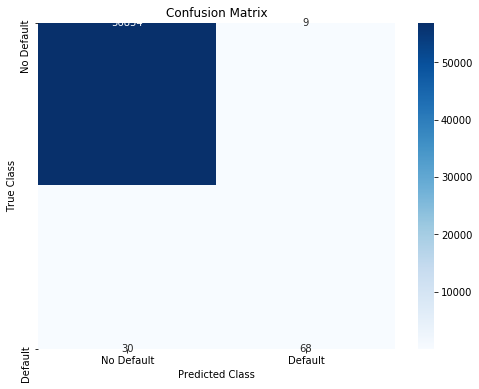

AUC(ROC): 0.8468596379339243
Precision: 0.8831168831168831
Recall: 0.6938775510204082
F1 score: 0.7771428571428571
False positives: 9
True positives: 68
False negatives: 30
True negatives: 56854


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    sm = SMOTE()
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    sm=KMeansSMOTE()
    
    X_res_train, y_train_res = sm.fit_sample(X_res_train, y_train_res.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 56851.0
 Average fp = 12.0
 Average fn = 25.0
 Average tp = 73.4
 Average Precision = 0.8594847775175644
 Average Recall = 0.7459349593495935
 Average F1 score = 0.7986942328618063


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284255
 Total fp: 60
 Total fn: 125
 Total tp: 367
 Total Precision = 0.8594847775175644
 Total Recall = 0.7459349593495935
 Total F1_score = 0.7986942328618063


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 27973.229728460312 seconds ---
27973.23072743416


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

7.770341868731711
